In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data =  pd.read_csv("startup_funding.csv")

In [20]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Ques.1 - Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.


Location
NCR          703
Bangalore    628
Mumbai       446
Name: count, dtype: int64


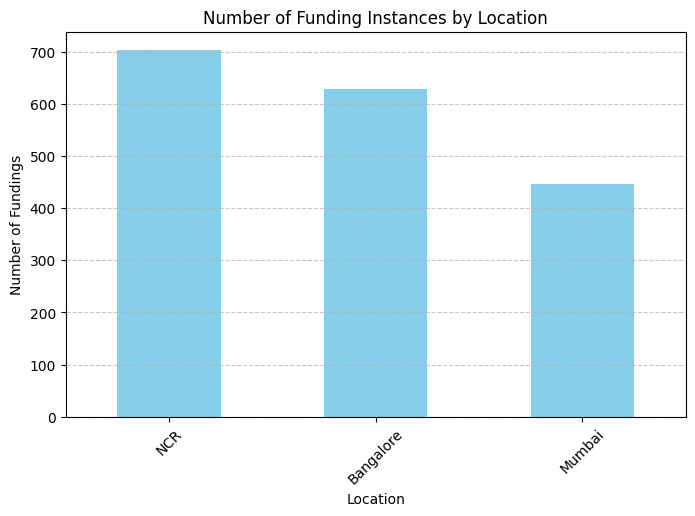

In [21]:
df = pd.DataFrame(data)

# Data Cleaning
df['CityLocation'] = df['CityLocation'].str.title() #Normalize Capitalization
df['CityLocation'] = df['CityLocation'].replace({'Delhi': 'New Delhi', 'Ncr': 'NCR'})

# Group the cities according to the location categories
ncr_cities = ['Gurgaon', 'Noida', 'New Delhi', 'NCR']
df['Location'] = df['CityLocation'].apply(lambda x : 'NCR' if x in ncr_cities else x)

#drop the NA Values
df = df.dropna(subset=['Location'])

# Counting funding instances per location
funding_counts = df[df['Location'].isin(['Bangalore', 'Mumbai', 'NCR'])]['Location'].value_counts()
#funding_counts = df['Location'].value_counts()
print(funding_counts.head(3))

# Plotting
plt.figure(figsize=(8, 5))
funding_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Funding Instances by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fundings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The Python script refines startup funding data by first normalizing city names for consistency and correcting common variations, such as replacing "Delhi" with "New Delhi" and "Bangalore" with "Bengaluru." It then groups relevant cities into broader regions like 'NCR' using a lambda function, enhancing clarity in regional analysis. Rows with missing location data are dropped to maintain the accuracy of the analysis, focusing solely on relevant entries. The script specifically counts funding occurrences in key locations ('Bengaluru', 'Mumbai', 'NCR'), aligning directly with the query regarding optimal locations for startup investments. A bar graph visually represents the data, featuring clear labeling and aesthetic choices such as color and label rotation, facilitating easy interpretation. The analysis concludes that NCR has received the most funding, making it a prime candidate for establishing a new startup.ngs, 

### Ques.2 - Even after trying for so many times, your friend's startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend's startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [22]:
startup_data = pd.read_csv("startup_funding.csv")

# convert names to a consistent format
startup_data['InvestorsName'] = startup_data['InvestorsName'].str.strip()

# Dropping rows where InvestorsName is missing or undisclosed
cleaned_data = startup_data[startup_data['InvestorsName'].notna() & (startup_data['InvestorsName'].str.lower() != 'undisclosed investors')]

# Splitting investors where multiple investors are listed in a single cell
# Convert each investment row into multiple rows, one per investor
all_investors = cleaned_data['InvestorsName'].str.split(',')
expanded_investors = all_investors.explode()

# Cleaning individual investor names
expanded_investors = expanded_investors.str.strip().str.lower()
expanded_investors = expanded_investors[expanded_investors != 'undisclosed']

# Counting occurrences of each investor
investor_counts = expanded_investors.value_counts()

# Get top 5 investors
top_5_investors = investor_counts.head(5)
top_5_investors


InvestorsName
sequoia capital         64
accel partners          53
kalaari capital         44
saif partners           43
indian angel network    41
Name: count, dtype: int64

The above code effectively processes a dataset of startup funding to identify the most active investors. It starts by loading the dataset and cleaning the InvestorsName column to ensure consistency by stripping any leading or trailing whitespace. The next step involves filtering out rows where the InvestorsName is either missing or labeled as 'undisclosed investors,' ensuring the analysis only considers valid, disclosed investments. Then, it handles multiple investors listed in a single cell by splitting these names on commas and expanding them into separate rows using the .explode() method, allowing each investor to be treated individually. This is crucial for accurate counting. Further cleaning includes normalizing the investor names to lowercase and removing any that are still labeled as 'undisclosed'. Finally, it counts each investor's appearances in the dataset using value_counts() and identifies the top 5 most active investors. 

### Ques.3 - After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [23]:
startup_data = pd.read_csv("startup_funding.csv")

# Normalize key startup names to handle inconsistencies
startup_data['StartupName'] = startup_data['StartupName'].replace({
    'Olacabs': 'Ola', 'Ola Cabs': 'Ola', 'Flipkart.com': 'Flipkart',
    'Oyo Rooms': 'Oyo', 'OyoRooms': 'Oyo', 'OYO Rooms': 'Oyo',
    'Paytm Marketplace': 'Paytm'
})

# Convert names to a consistent format and handle missing values
startup_data['InvestorsName'] = startup_data['InvestorsName'].str.strip()
cleaned_data = startup_data[startup_data['InvestorsName'].notna() & (startup_data['InvestorsName'].str.lower() != 'undisclosed investors')]

# Create a DataFrame with unique pairs of investors and startups
investor_startup_pairs = cleaned_data[['InvestorsName', 'StartupName']].drop_duplicates()

# Splitting investors where multiple investors are listed in a single cell and expand them into separate rows
investor_startup_pairs['InvestorsName'] = investor_startup_pairs['InvestorsName'].str.split(',')
investor_startup_expanded = investor_startup_pairs.explode('InvestorsName')

# Cleaning individual investor names
investor_startup_expanded['InvestorsName'] = investor_startup_expanded['InvestorsName'].str.strip().str.lower()

# Filter out blank or invalid investor names
investor_startup_expanded = investor_startup_expanded[investor_startup_expanded['InvestorsName'] != '']

# Counting unique startups per investor
unique_investment_counts = investor_startup_expanded.groupby('InvestorsName')['StartupName'].nunique()

# Get top 5 investors by the number of unique startups invested in
top_5_unique_investors = unique_investment_counts.sort_values(ascending=False).head(5)

# Display the top 5 unique investors
top_5_unique_investors


InvestorsName
sequoia capital         49
accel partners          47
kalaari capital         41
indian angel network    41
blume ventures          36
Name: StartupName, dtype: int64

The above code performs a comprehensive analysis to identify the top investors based on the diversity of their startup investments, focusing on unique companies. Initially, it loads and cleans the dataset by standardizing key startup names like Ola, Flipkart, Oyo, and Paytm to address inconsistencies and ensure accurate mapping. It also filters out entries where investor names are missing or labeled as 'undisclosed', maintaining only valid data. The code then creates a unique pairing of investors and startups, handling cases where multiple investors are listed together by splitting and expanding these into separate rows. This step is crucial for accurately assessing each investor's unique contributions. Additional cleaning ensures no investor names are blank or improperly formatted. The script finally counts each investor's unique startup investments, providing a clear ranking of the top 5 investors who demonstrate the widest range of interests in different startups.

### Ques.4 - Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are -"Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [24]:
startup_data = pd.read_csv("startup_funding.csv")

# Step 1: Normalize important startup names
startup_data['StartupName'] = startup_data['StartupName'].replace(
    {'Olacabs': 'Ola', 'Ola Cabs': 'Ola', 'Flipkart.com': 'Flipkart',
     'Oyo Rooms': 'Oyo', 'OyoRooms': 'Oyo', 'OYO Rooms': 'Oyo',
     'Paytm Marketplace': 'Paytm'})

# Step 2: Filter the dataset for 'Seed Funding' and 'Crowd Funding'
early_stage_data = startup_data[
    (startup_data['InvestmentType'] == 'Seed Funding') |
    (startup_data['InvestmentType'] == 'Crowd Funding')
]

# Create a DataFrame with unique pairs of investors and startups under the filtered conditions
early_stage_pairs = early_stage_data[['InvestorsName', 'StartupName']].drop_duplicates()

# Splitting investors where multiple investors are listed in a single cell and expand them into separate rows
early_stage_pairs['InvestorsName'] = early_stage_pairs['InvestorsName'].str.split(',')
expanded_early_stage_investors = early_stage_pairs.explode('InvestorsName')

# Cleaning individual investor names
expanded_early_stage_investors['InvestorsName'] = expanded_early_stage_investors['InvestorsName'].str.strip().str.lower()

# Filter out blank or invalid investor names
expanded_early_stage_investors = expanded_early_stage_investors[expanded_early_stage_investors['InvestorsName'] != '']

# Counting unique startups per investor in early-stage investments
unique_early_stage_counts = expanded_early_stage_investors.groupby('InvestorsName')['StartupName'].nunique()
specific_investor_counts = unique_early_stage_counts.drop(['undisclosed investors', 'undisclosed investor'])

# Recalculate the top 5 named investors for early-stage investments
top_5_specific_early_stage_investors = specific_investor_counts.sort_values(ascending=False).head(5)
top_5_specific_early_stage_investors


InvestorsName
indian angel network    34
rajan anandan           23
anupam mittal           16
letsventure             16
kunal shah              14
Name: StartupName, dtype: int64

The refined analysis aimed to identify top investors specializing in early-stage investments, specifically through "Seed Funding" and "Crowd Funding". To achieve this, the dataset was first normalized for key startup names like Ola, Flipkart, Oyo, and Paytm to address inconsistencies. The analysis then focused on filtering investments by the desired types. Entries for each investment were cleaned and deduplicated to ensure that only unique investor-startup pairings were considered, crucial for identifying true investment breadth. Investors labeled as "undisclosed" were excluded to focus on identifiable, actionable data. The resulting top list provides a clearer picture of active investors in early-stage sectors, offering valuable targets for fundraising efforts, particularly for startups in their nascent phases seeking specific types of investment support.

### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup, Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity, Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [25]:
startup_data = pd.read_csv("startup_funding.csv")

# Step 1: Normalize important startup names
startup_data['StartupName'] = startup_data['StartupName'].replace(
    {'Olacabs': 'Ola', 'Ola Cabs': 'Ola', 'Flipkart.com': 'Flipkart',
     'Oyo Rooms': 'Oyo', 'OyoRooms': 'Oyo', 'OYO Rooms': 'Oyo',
     'Paytm Marketplace': 'Paytm'})

# Step 2: Filter the dataset for 'Private Equity'
private_equity_data = startup_data[startup_data['InvestmentType'] == 'Private Equity']

# Create a DataFrame with unique pairs of investors and startups under the filtered conditions
private_equity_pairs = private_equity_data[['InvestorsName', 'StartupName']].drop_duplicates()

# Splitting investors where multiple investors are listed in a single cell and expand them into separate rows
private_equity_pairs['InvestorsName'] = private_equity_pairs['InvestorsName'].str.split(',')
expanded_private_equity_investors = private_equity_pairs.explode('InvestorsName')

# Cleaning individual investor names
expanded_private_equity_investors['InvestorsName'] = expanded_private_equity_investors['InvestorsName'].str.strip().str.lower()

# Filter out blank or invalid investor names
expanded_private_equity_investors = expanded_private_equity_investors[expanded_private_equity_investors['InvestorsName'] != '']

# Counting unique startups per investor in Private Equity investments
unique_private_equity_counts = expanded_private_equity_investors.groupby('InvestorsName')['StartupName'].nunique()

# Get top 5 investors by the number of unique startups invested in, under 'Private Equity'
top_5_private_equity_investors = unique_private_equity_counts.sort_values(ascending=False).head(5)
top_5_private_equity_investors


InvestorsName
sequoia capital    46
accel partners     43
kalaari capital    35
saif partners      26
blume ventures     26
Name: StartupName, dtype: int64

The above code provided strategically targets identifying the top investors in "Private Equity". Initially, it processes the dataset by normalizing names of major startups like Ola, Flipkart, Oyo, and Paytm to correct inconsistencies and ensure uniformity in data analysis. The next step filters investments specifically marked as "Private Equity," which is most suitable for startups moving beyond the early stages. To account for the granularity of investments, the code separates individual investors listed together for each startup, allowing for precise tracking of each investor's unique contributions. This is followed by cleaning up investor names and removing any blanks or non-specific entries. The analysis culminates in counting the number of unique startups each investor has funded, highlighting the top five based on their breadth of investment. This approach pinpoints investors with a broad and diverse investment portfolio, providing a valuable list of potential partners for expanding enterprises.